<a href="https://colab.research.google.com/github/mrlncredible/balakin_rep/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D1%86%D0%B5%D0%BD%D1%8B_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка данных

In [3]:
from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
from PIL import Image # Отрисовка изображений
import pandas as pd # Библиотека pandas
from google.colab import files # Импорт файлов
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных
from sklearn.model_selection import train_test_split # функция разделения на обучающую и проверочную/тестовую выборку

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline


## Загрузка файла

In [4]:
# Загружаем файлы
files.upload()
!ls # Выводим содержимое корневой папки

Saving cars_new.csv to cars_new.csv
cars_new.csv  sample_data


## Загрузка данных

In [5]:
# Считываем csv с помощью pandas
cars = pd.read_csv('cars_new.csv', sep=',')
cars[:5] # Выводим первые 5 машин 

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0


In [6]:
print(cars.values.shape)

(70119, 10)


In [7]:
# Создаём словарь поле - его индекс
def create_dict(s):
  ret = {}                          # Создаём пустой словарь
  for _id, name in enumerate(s):    # Проходим по всем парам - id и название
    ret.update({name: _id})         # Добавляем в словарь
  return ret

# Функция преобразования в one hot encoding
def to_ohe(value, d):
  arr = [0] * len(d)
  arr[d[value]] = 1
  return arr

In [8]:
# Создаём словари по всем текстовым колонкам
marks_dict = create_dict(set(cars['mark']))
models_dict = create_dict(set(cars['model']))
bodies_dict = create_dict(set(cars['body']))
kpps_dict = create_dict(set(cars['kpp']))
fuels_dict = create_dict(set(cars['fuel']))

# Запоминаем цены
prices = np.array(cars['price'], dtype=np.float)

# Запоминаем числовые параметры
# и нормируем
years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


In [9]:
print(marks_dict)

{'ford': 0, 'daewoo': 1, 'opel': 2, 'mazda': 3, 'renault': 4, 'subaru': 5, 'toyota': 6, 'skoda': 7, 'peugeot': 8, 'audi': 9, 'honda': 10, 'bmw': 11, 'mitsubishi': 12, 'nissan': 13, 'suzuki': 14, 'hyundai': 15, 'mercedes-benz': 16, 'kia': 17, 'volkswagen': 18, 'chevrolet': 19, 'chery': 20}


In [10]:
years.mean()

7.129646144783743e-15

In [11]:
years.std()

1.0

In [12]:
print(powers)

[ 0.22905575 -0.95630346 -0.87163494 ...  0.22905575 -0.75309902
  2.34576862]


In [13]:
# Создаём пустую обучающую выборку
x_train = []
y_train = []

# Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  # В y_train добавляем цену
  y_train.append(prices[_id])
  
  # В x_train объединяем все параметры
  # Категорийные параметры добавляем в виде ohe
  # Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  # Добавляем текущую строку в общий x_train
  x_train.append(x_tr)

# Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [14]:
# Выводим размеры выборок
print(x_train.shape)
print(y_train.shape)

(70119, 3208)
(70119,)


In [15]:
# Выводим один x_train
print(x_train[0,:20])
print(x_train[0,-20:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[ 0.          0.          0.          0.          0.          1.
  0.          0.          0.          1.          0.          0.
  1.          0.          0.          0.          1.5200145  -1.40018212
  0.12288486  0.22905575]


In [16]:
# Выводим y_train
print(y_train[:10])

[ 996000.  140200.  750000.  970000.  205000.  985000.  589000.  500000.
 1320000.  270000.]


In [17]:
# Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

# y_train.reshape(-1,1) добавляет одну размерность
# Это нужно потому, что y_scaler.fit_transform
# Требует двумерны вектор, массив примеров, которые надо нормализовать
# Он не умеет работать с одним примеров
# Поэтому мы делаем массив из одного примера
# На выходе он так же выдаёт массив примеров
# Но нам нужен только первый пример
# Поэтому мы делаем flatten() - уменьшение размерности

In [18]:
y_train_scaled.shape

(70119,)

In [19]:
# Выводим базовый и нормированный y_train
print(y_train[:10])
print(y_train_scaled[:10])

[ 996000.  140200.  750000.  970000.  205000.  985000.  589000.  500000.
 1320000.  270000.]
[ 0.75082432 -0.62135434  0.3563911   0.70913625 -0.51745486  0.73318706
  0.09824578 -0.04445567  1.27032173 -0.4132347 ]


# Cоздание НС

## Создание тестовой и проверочной выборки

In [20]:
# test_size=0.2 - будет выделено 20% от тренировочных данных 
# x_train - данные для обучения
# x_test - данные для проверки
# y_train - правильные ответы для обучения
# y_test - правильные ответы для проверки
x_train, x_test, y_train_scaled, y_test_scaled = train_test_split(x_train, y_train_scaled, test_size=0.2)    
print (x_train.shape)
print (x_test.shape)
print (y_train_scaled.shape)
print (y_test_scaled.shape)

(56095, 3208)
(14024, 3208)
(56095,)
(14024,)


In [42]:
# Функция пересоздаёт пустую сеть
def createModel():
    model_ula = Sequential()
    model_ula.add(Dense(3300, input_dim=3208, activation = 'relu', input_shape = x_train.shape[1:]))
    model_ula.add(Dense(1600, activation = 'relu'))
    model_ula.add(Dense(1, activation = 'linear'))
    model_ula.compile(optimizer = 'adam', loss = 'mse')

    return model_ula # Возвращаем созданную сеть

In [43]:
# Создаём пустую сеть при помощи функции createModel()
model_ula = createModel()
history = model_ula.fit(x_train, y_train_scaled, epochs = 20, batch_size = 10000, validation_split = 0.2, verbose=1)


Epoch 1/20
5/5 [==============================] - 66s 13s/step - loss: 0.5440 - val_loss: 0.3385
Epoch 2/20
5/5 [==============================] - 64s 13s/step - loss: 0.2357 - val_loss: 0.2569
Epoch 3/20
5/5 [==============================] - 65s 13s/step - loss: 0.1640 - val_loss: 0.2306
Epoch 4/20
5/5 [==============================] - 65s 13s/step - loss: 0.1306 - val_loss: 0.2172
Epoch 5/20
5/5 [==============================] - 66s 13s/step - loss: 0.1084 - val_loss: 0.2035
Epoch 6/20
5/5 [==============================] - 66s 13s/step - loss: 0.0875 - val_loss: 0.1993
Epoch 7/20
5/5 [==============================] - 65s 13s/step - loss: 0.0759 - val_loss: 0.1918
Epoch 8/20
5/5 [==============================] - 66s 13s/step - loss: 0.0624 - val_loss: 0.2030
Epoch 9/20
5/5 [==============================] - 63s 13s/step - loss: 0.0560 - val_loss: 0.2009
Epoch 10/20
5/5 [==============================] - 63s 13s/step - loss: 0.0501 - val_loss: 0.1925
Epoch 11/20
5/5 [============

In [44]:
predict = model_ula.predict(x_test)
predict_inverse = y_scaler.inverse_transform(predict).flatten()

In [45]:
print('Среднее значение цены:', np.average(predict_inverse))

Среднее значение цены: 510991.7


## Проверка качеста на тестовом наборе данных

In [48]:
# Вычисляем результаты сети на тестовом наборе
scores = model_ula.evaluate(x_test, y_test_scaled, verbose=1)

# scores - loss сети на тестовой выборке
print(scores)
print("Средняя ошибка на тестовых данных: ", round(scores, 4))

439/439 [==============================] - 22s 51ms/step - loss: 0.0786
0.07857929915189743
Средняя ошибка на тестовых данных:  0.0786


## Визуализация качества обучения 

In [49]:
# Ключи в структуре history
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


Печатаем значения ошибки на обучающем наборе данных

In [50]:
# Значения loss на обучающей выборке по эпохам
loss = history.history['loss']
history.history['loss']

[0.5440013408660889,
 0.23568807542324066,
 0.16404011845588684,
 0.1305953413248062,
 0.1084442138671875,
 0.08750160783529282,
 0.07587458193302155,
 0.06238582730293274,
 0.05595465376973152,
 0.050125546753406525,
 0.04597952961921692,
 0.04068398475646973,
 0.042050786316394806,
 0.03947705402970314,
 0.03766714408993721,
 0.03472186252474785,
 0.03205488622188568,
 0.030221939086914062,
 0.03075087070465088,
 0.029463430866599083]

In [51]:
print('Среднее значение ошибки на обучающей выборки', round(np.average(loss), 4))


Среднее значение ошибки на обучающей выборки 0.0939


Печатаем долю правильных ответов на проверочном наборе данных

In [52]:
# Значения точности распознавания на проверочной выборке по эпохам
val_loss = history.history['val_loss']
for i in range(len(val_loss)):
  print("Эпоха: ", i, " значение ошибки: ", round(100*val_loss[i], 1), "%", sep="")
  # round - округление
  # sep="" - убрать стандартный разделитель пробел при выводе строки

Эпоха: 0 значение ошибки: 33.9%
Эпоха: 1 значение ошибки: 25.7%
Эпоха: 2 значение ошибки: 23.1%
Эпоха: 3 значение ошибки: 21.7%
Эпоха: 4 значение ошибки: 20.3%
Эпоха: 5 значение ошибки: 19.9%
Эпоха: 6 значение ошибки: 19.2%
Эпоха: 7 значение ошибки: 20.3%
Эпоха: 8 значение ошибки: 20.1%
Эпоха: 9 значение ошибки: 19.3%
Эпоха: 10 значение ошибки: 19.4%
Эпоха: 11 значение ошибки: 20.3%
Эпоха: 12 значение ошибки: 19.7%
Эпоха: 13 значение ошибки: 20.1%
Эпоха: 14 значение ошибки: 20.0%
Эпоха: 15 значение ошибки: 19.4%
Эпоха: 16 значение ошибки: 19.4%
Эпоха: 17 значение ошибки: 19.2%
Эпоха: 18 значение ошибки: 19.6%
Эпоха: 19 значение ошибки: 19.4%


In [53]:
print('Средний процент ошибки на проверочной выборки:', round(100*np.average(val_loss), 1), '%')

Средний процент ошибки на проверочной выборки: 21.0 %


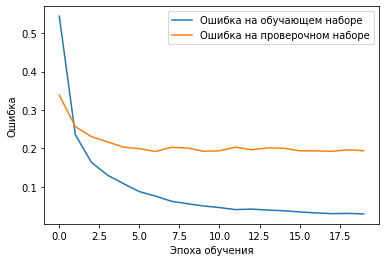

In [54]:
# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

## Та же сеть с использованием Dropout-слоёв


In [34]:
# Создаём сеть
model_ula = Sequential()
model_ula.add(Dense(3300, input_dim=3208, activation = 'relu', input_shape = x_train.shape[1:]))
model_ula.add(Dropout(0.3))
model_ula.add(Dense(1600, activation = 'relu'))
model_ula.add(Dropout(0.3))
model_ula.add(Dense(1, activation = 'linear'))
model_ula.compile(optimizer = 'adam', loss = 'mse')

history2 = model_ula.fit(x_train, y_train_scaled, epochs = 20, batch_size = 10000, validation_split = 0.2, verbose=1)

Epoch 1/20
5/5 [==============================] - 68s 13s/step - loss: 0.5740 - val_loss: 0.3191
Epoch 2/20
5/5 [==============================] - 66s 13s/step - loss: 0.2401 - val_loss: 0.2720
Epoch 3/20
5/5 [==============================] - 65s 13s/step - loss: 0.1775 - val_loss: 0.2514
Epoch 4/20
5/5 [==============================] - 68s 13s/step - loss: 0.1587 - val_loss: 0.2288
Epoch 5/20
5/5 [==============================] - 64s 13s/step - loss: 0.1274 - val_loss: 0.2059
Epoch 6/20
5/5 [==============================] - 64s 13s/step - loss: 0.1064 - val_loss: 0.1985
Epoch 7/20
5/5 [==============================] - 66s 13s/step - loss: 0.0915 - val_loss: 0.1972
Epoch 8/20
5/5 [==============================] - 66s 13s/step - loss: 0.0821 - val_loss: 0.1971
Epoch 9/20
5/5 [==============================] - 68s 14s/step - loss: 0.0712 - val_loss: 0.1918
Epoch 10/20
5/5 [==============================] - 68s 14s/step - loss: 0.0613 - val_loss: 0.1876
Epoch 11/20
5/5 [============

In [35]:
model_ula.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3300)              10589700  
                                                                 
 dropout (Dropout)           (None, 3300)              0         
                                                                 
 dense_4 (Dense)             (None, 1600)              5281600   
                                                                 
 dropout_1 (Dropout)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 1601      
                                                                 
Total params: 15,872,901
Trainable params: 15,872,901
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Вычисляем результаты сети на тестовом наборе
scores = model_ula.evaluate(x_test, y_test_scaled, verbose=1)

# scores - loss сети на тестовой выборке
print(scores)
print("Средняя ошибка на тестовых данных:", round(scores, 4))
print('Средний процент ошибки на проверочной выборки:', round(100*np.average(val_loss), 1), '%')

439/439 [==============================] - 18s 41ms/step - loss: 0.0762
0.0761810690164566
Средняя ошибка на тестовых данных: 0.0762
Средний процент ошибки на проверочной выборки: 24.1 %


In [37]:
predict = model_ula.predict(x_test)
predict_inverse = y_scaler.inverse_transform(predict).flatten()
print('Среднее значение цены:', np.average(predict_inverse))

Среднее значение цены: 522335.38


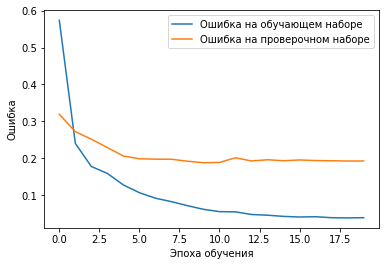

In [38]:
# Выводим графики ошибки
plt.plot(history2.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history2.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()